In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Separate features (X) and target (y)
X = df.drop("target", axis=1) 
y = df["target"]



In [7]:
# Split the data (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display the shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (820, 13)
X_test shape: (205, 13)
y_train shape: (820,)
y_test shape: (205,)


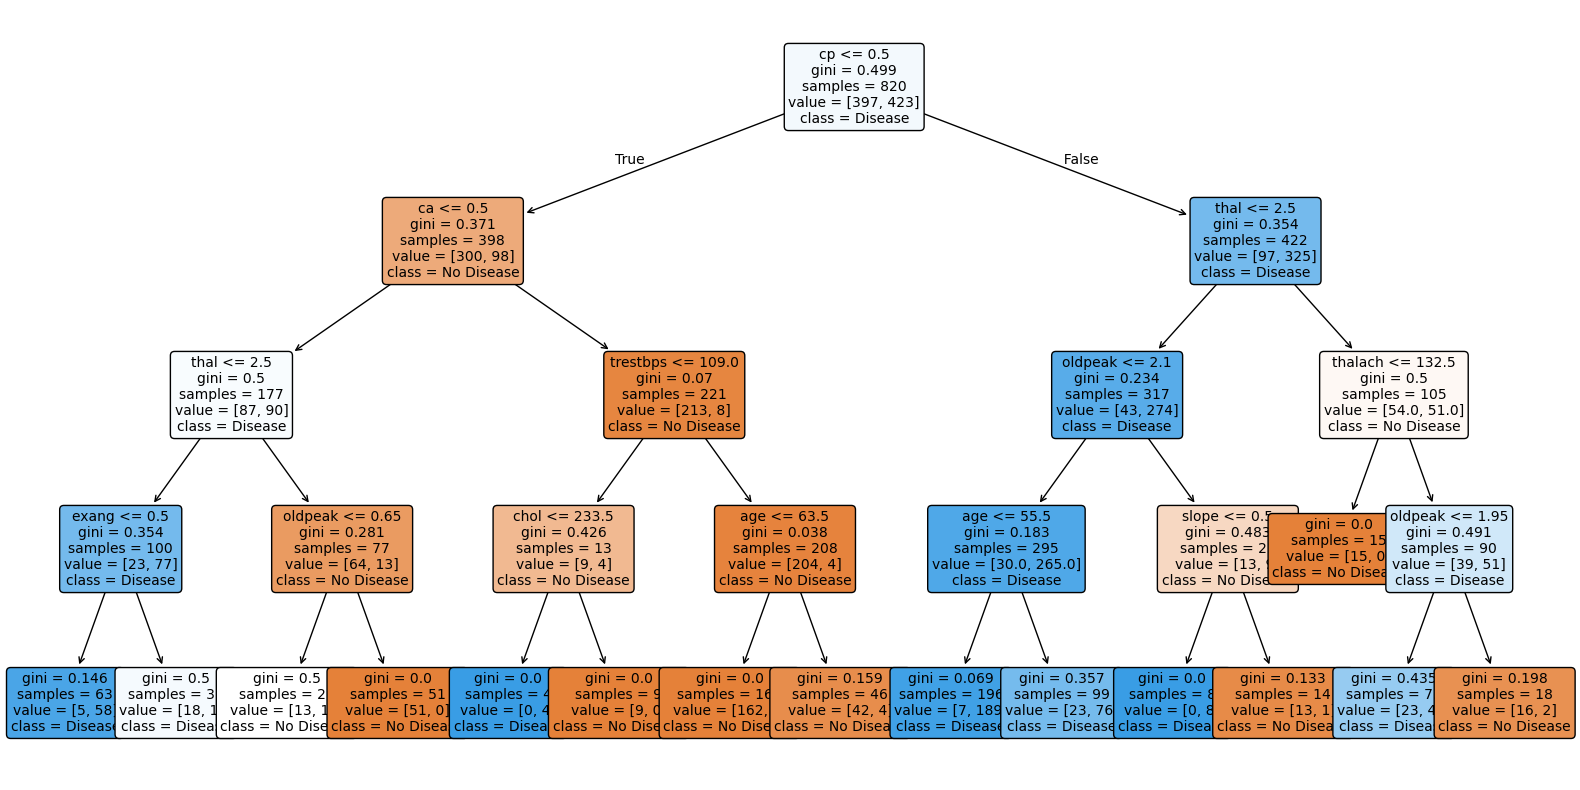

In [8]:
#Decision Tree Classifier ,visualization of the tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, fontsize=10)
plt.show()




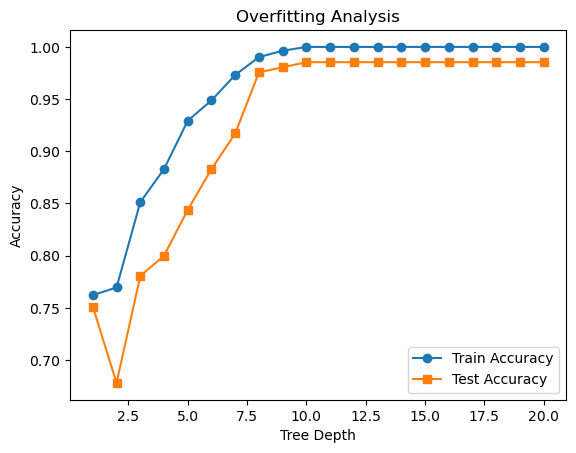

In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
depths = range(1, 21)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, test_acc, marker='s', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.legend()
plt.show()


In [10]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train the model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 0.2
Mean Squared Error (MSE): 0.2


In [12]:
## Import model and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 98.54%


In [13]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

#Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

#Compare accuracies
print(f"Random Forest Accuracy:  {rf_acc * 100:.2f}%")
print(f"Decision Tree Accuracy:  {dt_acc * 100:.2f}%")




Random Forest Accuracy:  98.54%
Decision Tree Accuracy:  98.54%


     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


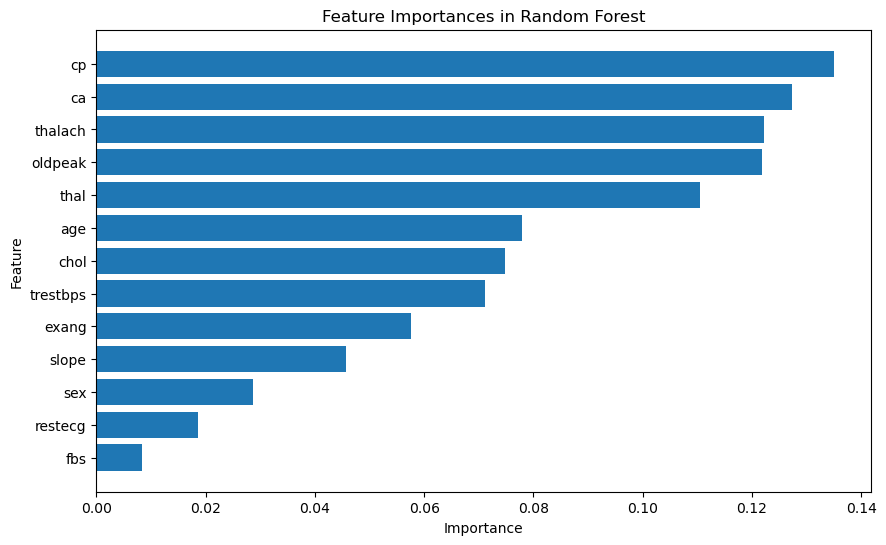

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

# Display results
print("Cross-Validation Scores for each fold:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard Deviation: {np.std(cv_scores) * 100:.2f}%")


Cross-Validation Scores for each fold: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 99.71%
Standard Deviation: 0.59%
